In [1]:
%matplotlib inline

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

# 1. Problem definition and data description

Given the Google`s Online shoppers intention dataset, the main goal of this notebook is to:
- Explore the dataset and extract features
- Apply Machine learning methods - train, test and evalute different classification algorithms
- Propose potential business application

Dataset description:
- $\textbf{Administrative, Administrative Duration, Informational, Informational  Duration, Product Related and Product Related Duration}$ - number of  different types of pages visited by the visitor in that session and total time  spent in each of these page categories
- $\textbf{Bounce Rate}$ - Google Analytics Metric. The percentage of visitors who enter  the site from that page and then leave (“bounce”) without triggering any  other requests to the analytics server during that session
- $\textbf{Exit Rate}$ - Google Analytics Metric. Feature for a specific web page is  calculated as for all pageviews to the page, the percentage that were the last  in the session
- $\textbf{Page Value}$ - the average value for a web page that a user visited before  completing an e-commerce transaction.
- $\textbf{Special Day}$ - indicates the closeness of the site visiting time to a specific  special day (e.g. Mother’s Day, Valentine’s Day) in which the sessions are  more likely to be finalized with transaction.
- $\textbf{Operating system}$ - Operating System of the user.
- $\textbf{Browser}$ - Browser of the user.
- $\textbf{Region}$ - Region of the user
- $\textbf{Month}$ - month of the transaction
- $\textbf{Weekend}$ - Flag if the transactions was made during the weekend.
- $\textbf{Traffic type}$ - Traffic Type of the user
- $\textbf{Visitor type}$ - New or Returning Visitor
- $\textbf{Revenue}$ - The target column. TRUE values mean a purchase was made and FALSE mean a purchase was not made. This is the target variable we are going to build a classification model to forecast.

# 2. Exploratory Data Analysis & Data Preparation

## 2.1. EDA

In [3]:
# Reading and displaying dataset
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Checking dataset shape
data.shape

(12330, 18)

In [5]:
# Data description - dtypes, null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

None of the columns contains null value, we can move to further data inspection.

In [6]:
# Displaying descriptive statistict for each numeric column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [7]:
# changing Weekend and Revenue dtypes from boolean to object
data['Weekend'] = data['Weekend'].replace({True: '1', False: '0'})
data['Revenue'] = data['Revenue'].replace({True: '1', False: '0'})

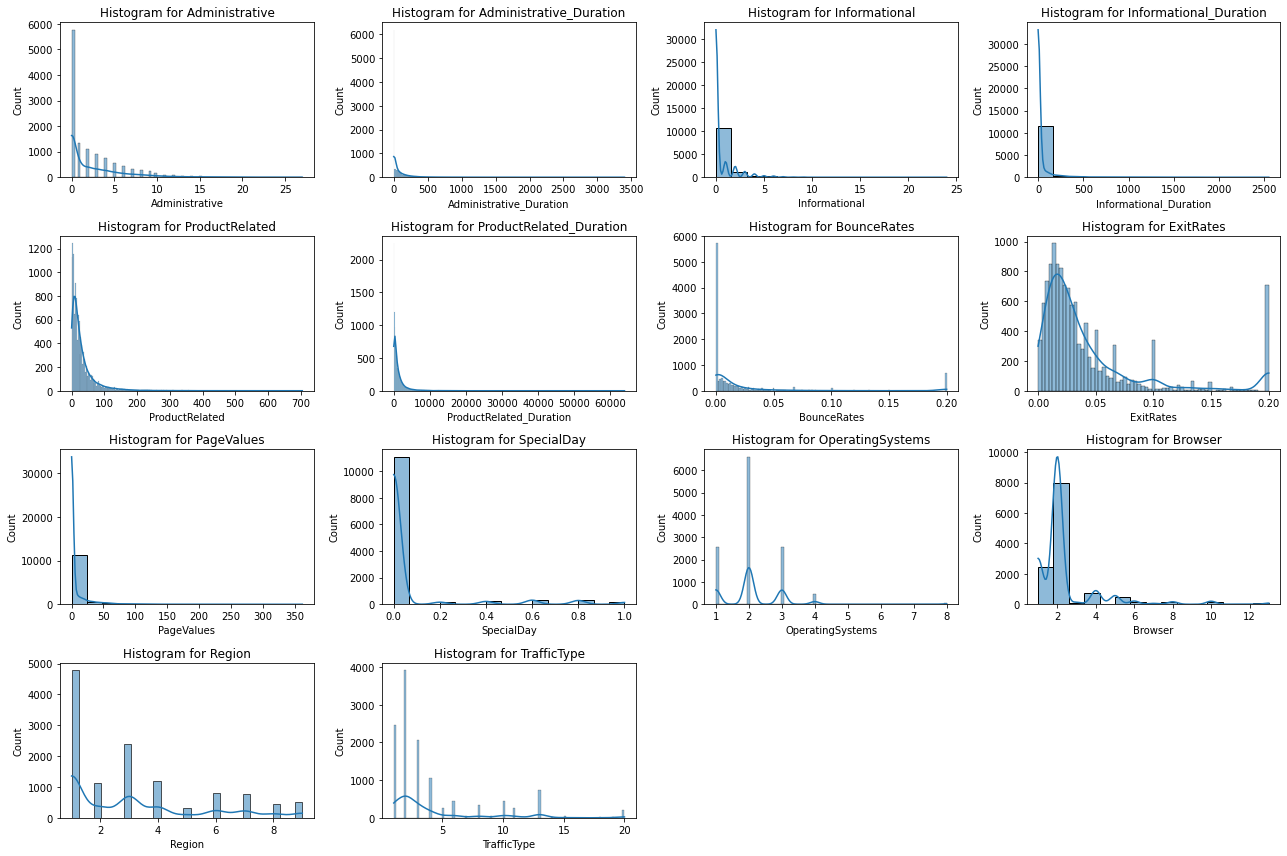

In [8]:
# Plotting histograms for each numeric column
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = 4
num_rows = len(numeric_columns) // num_cols + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (18, 12))

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data[column], ax = axes[row, col], kde = True)
    axes[row, col].set_title(f'Histogram for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

From the histogram plots of the numeric columns 2 things can be established at first glance:
- Some of the columns ($\textbf{OperatingSystems, Browser, Region, TrafficType}$) should be treated as categorical columns and would require additional data preparation methods.
- If Gradient descent algorithm is being applied, the continious columns data should be normalized.

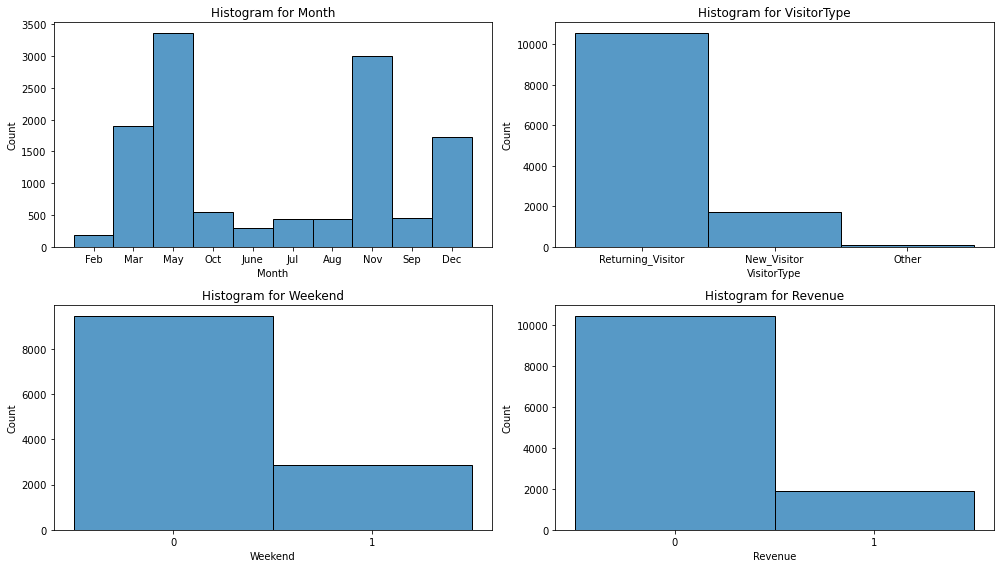

In [9]:
# Plotting histograms for each pair of object-type columns
object_columns = data.select_dtypes(include=['object']).columns
num_cols = 2
num_rows = len(object_columns) // num_cols + (len(object_columns) % num_cols > 0)
fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (14, 8))

for i, column in enumerate(object_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data[column], discrete = True, ax = axes[row, col])
    axes[row, col].set_title(f'Histogram for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

for i in range(len(object_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

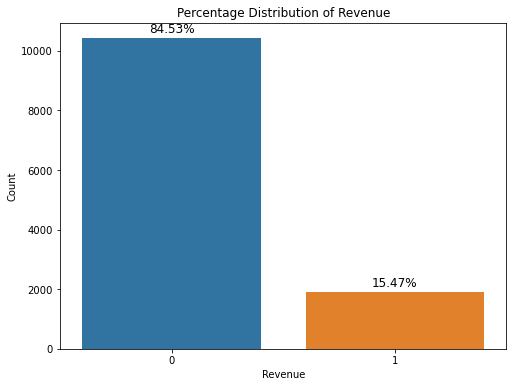

In [10]:
percentage_distribution = data['Revenue'].value_counts(normalize = True) * 100

# Create a countplot for the 'Revenue' column
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Revenue', data = data)

# Add percentage labels on top of the bars
total = len(data['Revenue'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center', fontsize = 12, color = 'black', xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Percentage Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

From the histogram plots of the non-numeric columns it can be seen:
- $\textbf{Month}$ has missing months for the year - $\textit{January, April}$. Some of the months $\textit{May, November, March, December}$ have high value count, but since the collected data is only for 1 year - market seasonality cannot be used. It is safe to say that $\textbf{Month}$ can be excluded from the dataset in order to avoid adding noise to the models.
- Dataset is imbalanced - positive labels are ~15%. So stratification and specific model evaluation metrics should be applied ($\textit{Precision, Recall, F1 Score}$) 

In [11]:
# changing categorical columns dtypes to object
data['OperatingSystems'] = data['OperatingSystems'].astype(object)
data['Region'] = data['Region'].astype(object)
data['Browser'] = data['Browser'].astype(object)
data['TrafficType'] = data['TrafficType'].astype(object)

# target varible encoding
data['Revenue'] = data['Revenue'].replace({'1': 1, '0': 0})


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

<AxesSubplot:>

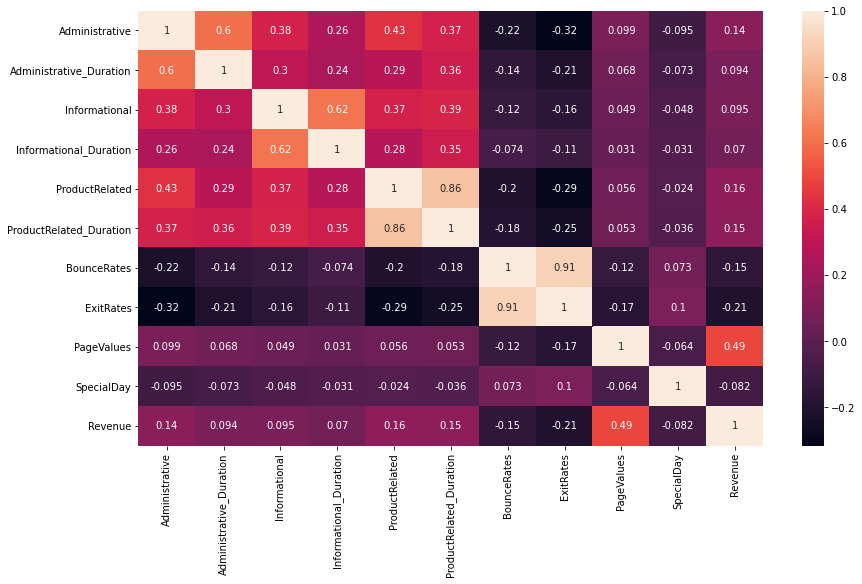

In [13]:
# displaying correlation coefficients matrix
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)

Conclusions from the correlation matrix:
- $\textbf{Administrative, Informational, ProductRelated}$ and their respective $\textbf{Duration}$ columns seem to have high correlation. Since they represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories, feature engineering can be applied and replace the pairs of columns with 1 in order to avoid fitting noise into models.
- $\textbf{BounceRates}$ and $\textbf{ExitRates}$ also have high correlation, but this seems to be due to the distribution accumulation in 0 and 0.2. I will leave them as is.
- $\textbf{PageValues}$ could be a valuable predictor due to its relatively high correlation with the target column.

## 2.2. Data Preparation

In [14]:
data['administrative_prc'] = data['Administrative'] / (data['Administrative_Duration']+ 0.0000000001)
data['informational_prc'] = data['Informational'] / (data['Informational_Duration']+ 0.0000000001)
data['product_related_prc'] = data['ProductRelated'] / (data['ProductRelated_Duration']+ 0.0000000001)

In [15]:
data = data.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Month'], axis = 1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BounceRates          12330 non-null  float64
 1   ExitRates            12330 non-null  float64
 2   PageValues           12330 non-null  float64
 3   SpecialDay           12330 non-null  float64
 4   OperatingSystems     12330 non-null  object 
 5   Browser              12330 non-null  object 
 6   Region               12330 non-null  object 
 7   TrafficType          12330 non-null  object 
 8   VisitorType          12330 non-null  object 
 9   Weekend              12330 non-null  object 
 10  Revenue              12330 non-null  int64  
 11  administrative_prc   12330 non-null  float64
 12  informational_prc    12330 non-null  float64
 13  product_related_prc  12330 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 1.3+ MB


In [17]:
def plot_objects_histogram(data):
    object_columns = data.select_dtypes(include=['object']).columns

    # Set up the subplots
    num_cols = 2
    num_rows = len(object_columns) // num_cols + (len(object_columns) % num_cols > 0)
    fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (12, 8))

    for i, column in enumerate(object_columns):
        row = i // num_cols
        col = i % num_cols
        value_counts = data[column].value_counts(normalize = True) * 100 
        sns.barplot(x = value_counts.index, y = value_counts.values, ax = axes[row, col])
        axes[row, col].set_title(f'Distribution of {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Percentage')
        axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation = 45, horizontalalignment = 'right')

    for i in range(len(object_columns), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

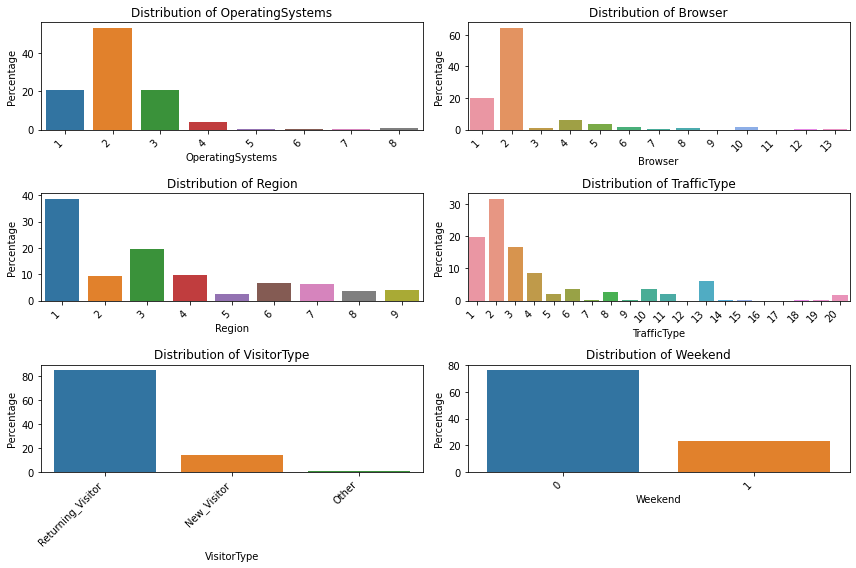

In [18]:
plot_objects_histogram(data)

On some of the columns the values have low occurance:
- $\textbf{OperatingSystems}$ - there are some main operating systems like Android, iOS, Windows.
- $\textbf{Browser}$ - there are some main browsers like Chrome, Safari, Firefox.
- $\textbf{TrafficType}$ - as I saw from this $\href{https://www.searchmarketingresource.com/search-marketing-and-website-design-news/5-traffic-types-for-google-analytics/}{source}$ there are some main traffic types also.

That's why I will apply data binning process in order to:
- $\textbf{Reduce the dimensionality}$ - there is not much data for this dataset and this will reduce the complexity of the categorical variables.
- $\textbf{Avoid overfitting}$ - this will help the model to generalize better to new instances.
- $\textbf{Enhance robustness}$ - this will make the model less sensitive to minor fluctuations in the data.

In [19]:
def apply_binning(column_name, threshold):
    category_counts = data[column_name].value_counts(normalize = True) * 100

    # Identify categories below the threshold
    categories_to_group = category_counts[category_counts < threshold].index

    # Replace categories below the threshold with 'Other'
    data[column_name] = data[column_name].apply(lambda x: 'Other' if x in categories_to_group else x)

In [20]:
apply_binning('OperatingSystems', 3)
apply_binning('Browser', 3.5)
apply_binning('TrafficType', 5)

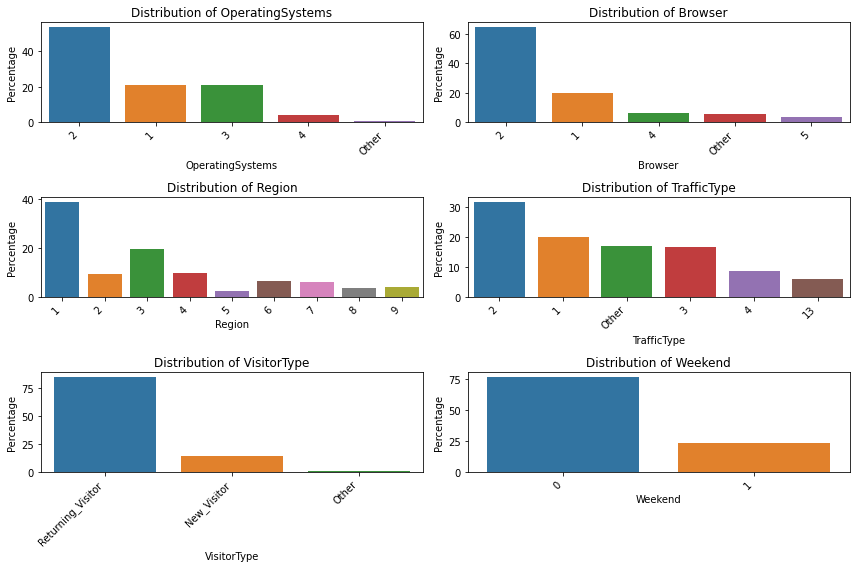

In [21]:
plot_objects_histogram(data)

Now after the data has been reduced to less categorical value counts, one-hot encoding can be applied.

In [22]:
data = pd.get_dummies(data)

In [23]:
# checking data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BounceRates                    12330 non-null  float64
 1   ExitRates                      12330 non-null  float64
 2   PageValues                     12330 non-null  float64
 3   SpecialDay                     12330 non-null  float64
 4   Revenue                        12330 non-null  int64  
 5   administrative_prc             12330 non-null  float64
 6   informational_prc              12330 non-null  float64
 7   product_related_prc            12330 non-null  float64
 8   OperatingSystems_1             12330 non-null  uint8  
 9   OperatingSystems_2             12330 non-null  uint8  
 10  OperatingSystems_3             12330 non-null  uint8  
 11  OperatingSystems_4             12330 non-null  uint8  
 12  OperatingSystems_Other         12330 non-null 

## 2.3. Data modeling

In [24]:
X = data.drop('Revenue', axis = 1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [25]:
print(f'X and y train: {X_train.shape}, {y_train.shape}\nX and y test:  {X_test.shape}, {y_test.shape}')
print(f'y_train % of target column: {y_train[y_train == 1].count() / len(y_train) * 100:.2f}%')
print(f'y_test  % of target column: {y_test[y_test == 1].count() / len(y_test) * 100:.2f}%')

X and y train: (9864, 37), (9864,)
X and y test:  (2466, 37), (2466,)
y_train % of target column: 15.47%
y_test  % of target column: 15.49%


In [26]:
# defining model evaluation function which will be used to compare different models
def model_evaluation(model_name, model, X_train, y_train, X_test, y_test):
    
    print(f'Evaluating model: {model_name}')
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Predicted probabilities for ROC curve
    train_probs = model.predict_proba(X_train)[:, 1]
    test_probs = model.predict_proba(X_test)[:, 1]

    # Metrics calculation
    metrics = {
        'Accuracy': [accuracy_score(y_train, train_predictions), accuracy_score(y_test, test_predictions)],
        'F1 Score': [f1_score(y_train, train_predictions), f1_score(y_test, test_predictions)],
        'Precision': [precision_score(y_train, train_predictions), precision_score(y_test, test_predictions)],
        'Recall': [recall_score(y_train, train_predictions), recall_score(y_test, test_predictions)],
        'ROC AUC': [roc_auc_score(y_train, train_probs), roc_auc_score(y_test, test_probs)]
    }
    
    # ROC Curve
    fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
    
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr_train, tpr_train, color = 'b', label = 'ROC Curve (train data)')
    plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Train Data)')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(fpr_test, tpr_test, color = 'r', label = 'ROC Curve (test data)')
    plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test Data)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Confusion Matrix
    cm_train = confusion_matrix(y_train, train_predictions)
    cm_test = confusion_matrix(y_test, test_predictions)
    
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_train, annot = True, fmt = 'd', cmap = 'Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Train Data)')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_test, annot = True, fmt = 'd', cmap = 'Oranges')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Test Data)')
    
    plt.tight_layout()
    plt.show()
    
    for metric, (train_metric, test_metric) in metrics.items():
        print(f"{metric}: Train - {train_metric:.2f}, Test - {test_metric:.2f}")

### 2.3.1. Random Forest Classification

On separate notebook I've trained RFC with GridSearchCV (k_fold = 5, scoring = make_scorer(f1_score)) with the following grid:

param_grid = {

    'n_estimators': [70, 150],
    'max_features': ['sqrt'], # default
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': [None, 'balanced'],
    'criterion': ['entropy'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

For faster computation I'll directly use the best parameters which are:

Best Parameters: {

    'class_weight': 'balanced', 
    'criterion': 'entropy', 
    'max_depth': 20, 
    'max_features': 'sqrt', 
    'min_impurity_decrease': 0.0, 
    'min_samples_leaf': 3, 
    'min_samples_split': 2, 
    'n_estimators': 150
}

In [27]:
rf_classifier = RandomForestClassifier(class_weight = 'balanced', 
                                       criterion = 'entropy', 
                                       max_depth = 20, 
                                       max_features = 'sqrt', 
                                       min_impurity_decrease = 0.0, 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 2, 
                                       n_estimators = 150,
                                       random_state=42, 
                                       n_jobs = -1)

In [28]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features='sqrt', min_samples_leaf=3,
                       n_estimators=150, n_jobs=-1, random_state=42)

Evaluating model: Random Forest


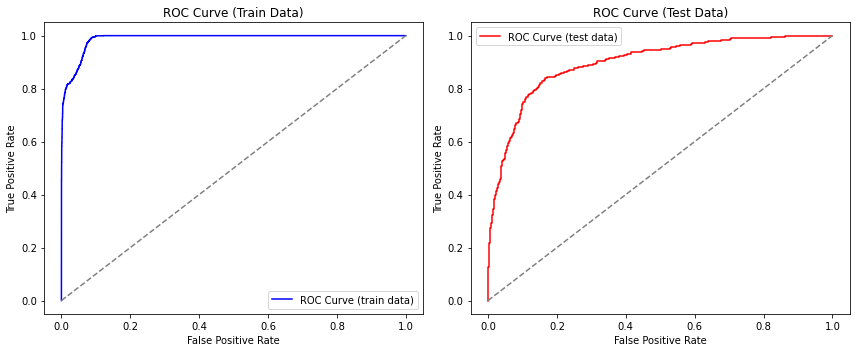

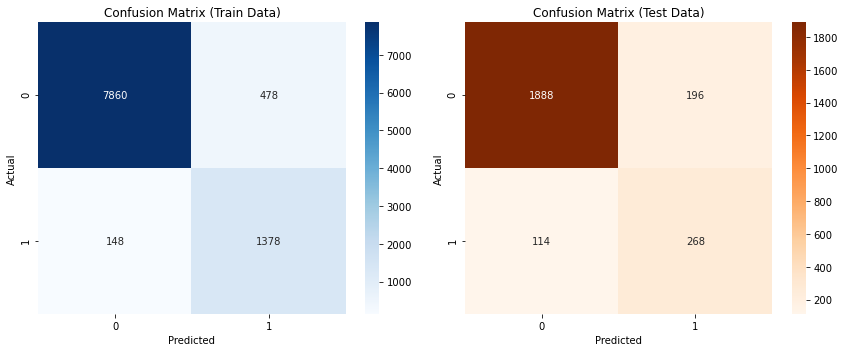

Accuracy: Train - 0.94, Test - 0.87
F1 Score: Train - 0.81, Test - 0.63
Precision: Train - 0.74, Test - 0.58
Recall: Train - 0.90, Test - 0.70
ROC AUC: Train - 0.99, Test - 0.90


In [29]:
model_evaluation('Random Forest', rf_classifier, X_train, y_train, X_test, y_test)

In [30]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by = 'Importance', ascending = False)

In [31]:
importances_df.head(15)

,Feature,Importance
2,PageValues,0.423452
1,ExitRates,0.122940
6,product_related_prc,0.089914
0,BounceRates,0.074597
4,administrative_prc,0.074595
5,informational_prc,0.032965
27,TrafficType_2,0.014954
3,SpecialDay,0.012199
17,Region_1,0.011419
28,TrafficType_3,0.008598


#### Conclusions:
- $\textbf{PageValues}$ is a top predictor as expected.
- An overfitting and high variance can be observed - there is significant difference between Train and Test evaluation metrics describing the imbalanced dataset ($\textit{Precision, Recall, F1 Score}$). So the model is not generalizing good to unseen data.
On separate notebook I've tried to make a GridSearch with different hyperparameter values in order to reduce the model complexity:

    param_grid = {

        'n_estimators': [70, 150],
        'max_features': ['sqrt'],
        'max_depth': [10, 15],  # Reduced max_depth
        'min_samples_split': [5, 10],  # Increased min_samples_split
        'min_samples_leaf': [1, 3],
        'class_weight': [None, 'balanced'],
        'criterion': ['entropy'],
        'min_impurity_decrease': [0.0, 0.1, 0.2],
    },
    but no difference was observed. $\textbf{Therefore I can conclude that the dataset is small and more records should be acquired}$.
- Categorical features are not with high importance - from top 10 predictors, which add up to 86% of the total importance for correct prediction, only 3 are categorical.
- Simpler model could provide more stability and robustness but for the cost of higher missclassification.


### 2.3.2. Logistic Regression

- Since it is quite easy to overfit the models with small datasets, I am going to reduce the input features for $\textbf{Logistic Regression}$ with taking only top 10 predictors. If needed, model complexity can be increased with 2-nd or 3-rd degree polynom.
- Since $\textbf{Logistic Regression}$ predicting coeffitients are optimized trough gradient descent, the data should be scaled. For data scaling $\textbf{StandardScaler}$ is more appropriate in this case due to the smaller dataset - $\textbf{MinMaxScaler}$ is not suitable for its sensitiveness to outliers.

In [32]:
# selecting only top 10 predictors for logistic regression
X_train_lr = X_train[['PageValues', 'ExitRates', 'product_related_prc', 'BounceRates', 'administrative_prc', 'informational_prc', 'TrafficType_2', 'SpecialDay', 'Region_1', 'TrafficType_3']]
X_test_lr = X_test[['PageValues', 'ExitRates', 'product_related_prc', 'BounceRates', 'administrative_prc', 'informational_prc', 'TrafficType_2', 'SpecialDay', 'Region_1', 'TrafficType_3']]

print(f'X and y train: {X_train_lr.shape}, {y_train.shape}\nX and y test:  {X_test_lr.shape}, {y_test.shape}')

X and y train: (9864, 10), (9864,)
X and y test:  (2466, 10), (2466,)


In [33]:
# Scaling only numerical columns
num_cols = ['PageValues', 'ExitRates', 'product_related_prc', 'BounceRates', 'administrative_prc', 'informational_prc', 'SpecialDay']

dummy_cols = ['TrafficType_2', 'Region_1', 'TrafficType_3']

scaler = StandardScaler()
X_train_lr_scaled = X_train_lr.copy()
X_test_lr_scaled = X_test_lr.copy()

X_train_lr_scaled[num_cols] = scaler.fit_transform(X_train_lr_scaled[num_cols])
X_test_lr_scaled[num_cols] = scaler.transform(X_test_lr_scaled[num_cols])

X_train_lr_scaled = pd.concat([X_train_lr_scaled[num_cols], X_train_lr[dummy_cols]], axis = 1)
X_test_lr_scaled = pd.concat([X_test_lr_scaled[num_cols], X_test_lr[dummy_cols]], axis = 1)

On separate notebook I've trained LogisticRegression with GridSearchCV (k_fold = 5, scoring = make_scorer(f1_score)) with the following grid:

param_grid = {

    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}

For faster computation I'll directly use the best parameters which are:

Best Parameters: {

    'C': 0.01, 
    'class_weight': 'balanced', 
    'max_iter': 100, 
    'penalty': 'l1', 
    'solver': 'liblinear'
}

In [34]:
logreg = LogisticRegression(C = 0.01, 
                            class_weight = 'balanced', 
                            max_iter = 100, 
                            penalty = 'l1', 
                            solver = 'liblinear')

In [35]:
logreg.fit(X_train_lr_scaled, y_train)

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

Evaluating model: Logistic Regression


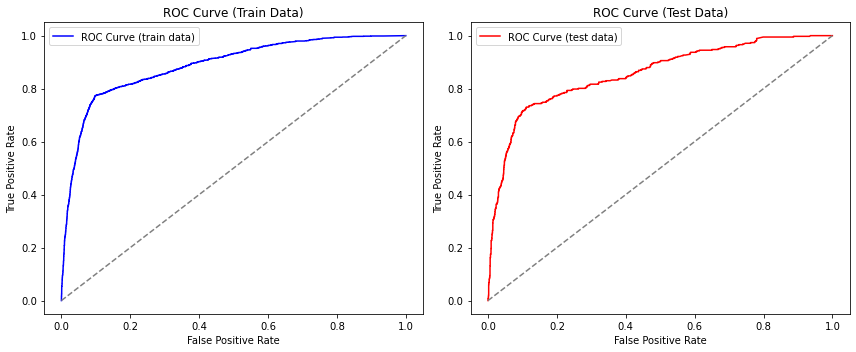

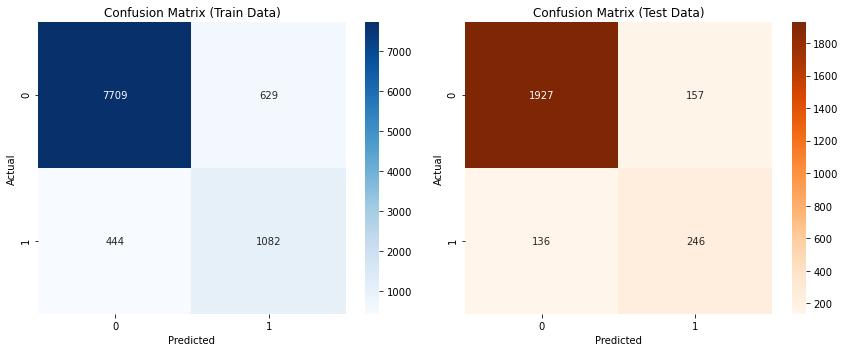

Accuracy: Train - 0.89, Test - 0.88
F1 Score: Train - 0.67, Test - 0.63
Precision: Train - 0.63, Test - 0.61
Recall: Train - 0.71, Test - 0.64
ROC AUC: Train - 0.89, Test - 0.86


In [36]:
model_evaluation('Logistic Regression', logreg, X_train_lr_scaled, y_train, X_test_lr_scaled, y_test)

#### Conclusions:
- $\textbf{Logistic Regression}$ is simpler model and fitting it to this datasets results in high bias and lower prediction score.
- $\textbf{Logistic Regression}$ model seems to present higher robustness compared to $\textbf{RFC}$.
- When the model is presenting high bias acquring more data records would not improve its prediction score. In this case the model complexity can be increased with Polynomial features.

### 2.3.3. Logistic Regression with Polynomial features

In [37]:
poly = PolynomialFeatures(degree = 2, include_bias = False)

poly_features_train = poly.fit_transform(X_train_lr_scaled)
poly_features_test = poly.transform(X_test_lr_scaled)

print(f'X and y train: {poly_features_train.shape}, {y_train.shape}\nX and y test:  {poly_features_test.shape}, {y_test.shape}')

X and y train: (9864, 65), (9864,)
X and y test:  (2466, 65), (2466,)


On separate notebook I've trained LogisticRegression (2-nd degree polynom) with GridSearchCV (k_fold = 5, scoring = make_scorer(f1_score)) with the following grid:

param_grid = {

    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}


Best Parameters turned out to be exactly the same like the standard LogisticRegression.

In [38]:
logreg_poly = LogisticRegression(C = 0.01,
                                 class_weight = 'balanced', 
                                 max_iter = 100, 
                                 penalty = 'l1', 
                                 solver = 'liblinear')

In [39]:
logreg_poly.fit(poly_features_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

Evaluating model: Logistic Regression (Polynomial features, 2-nd degree)


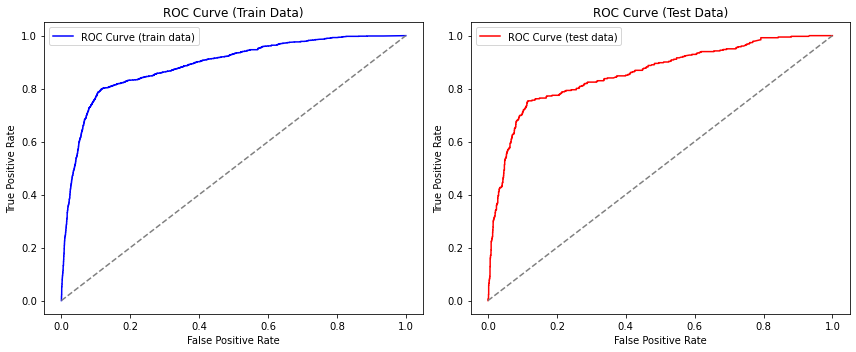

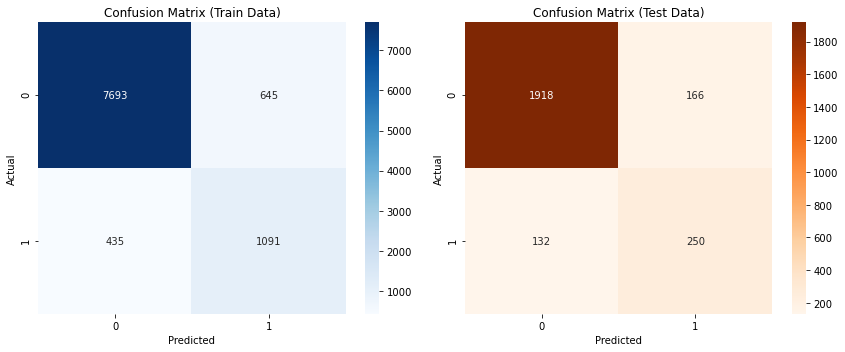

Accuracy: Train - 0.89, Test - 0.88
F1 Score: Train - 0.67, Test - 0.63
Precision: Train - 0.63, Test - 0.60
Recall: Train - 0.71, Test - 0.65
ROC AUC: Train - 0.89, Test - 0.86


In [40]:
model_evaluation('Logistic Regression (Polynomial features, 2-nd degree)', logreg_poly, poly_features_train, y_train, poly_features_test, y_test)

#### Conclusions:
- $\textbf{Logistic Regression}$ with 2-nd degree polynom input features did not produce better results. I was expecting at least higher regularization to be selected from GridSearch. Even if the complexity is increased to 3-rd order polynom the results wouldn't be better. This model is not suitable for this task.

# 3. Final results

In this final section I am presenting the results from the trained models and a possible added values for the business.

In [41]:
# Initialize models
models = {
    'Random Forest': rf_classifier,
    'Logistic Regression': logreg,
    'Logistic Regression with 2nd degree polynomial': logreg_poly
}

# Initialize train and test data for each model
train_data = {
    'Random Forest': X_train,
    'Logistic Regression': X_train_lr_scaled,
    'Logistic Regression with 2nd degree polynomial': poly_features_train
}

test_data = {
    'Random Forest': X_test,
    'Logistic Regression': X_test_lr_scaled,
    'Logistic Regression with 2nd degree polynomial': poly_features_test
}

# Set up cross-validation
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

metrics_dict = {'Model': [], 'Data': [], 'Accuracy': [], 'F1 Score': [], 'Recall': [], 'Precision': [], 'ROC AUC': []}

for model_name, model in models.items():
    for data_name, data in {'Train': train_data, 'Test': test_data}.items():
        X_data = data[model_name]
        accuracy_scores = cross_val_score(model, X_data, y_train if data_name == 'Train' else y_test, cv = cv, scoring = 'accuracy')
        f1_scores = cross_val_score(model, X_data, y_train if data_name == 'Train' else y_test, cv = cv, scoring = 'f1')
        recall_scores = cross_val_score(model, X_data, y_train if data_name == 'Train' else y_test, cv = cv, scoring = 'recall')
        precision_scores = cross_val_score(model, X_data, y_train if data_name == 'Train' else y_test, cv = cv, scoring = 'precision')
        roc_auc_scores = cross_val_score(model, X_data, y_train if data_name == 'Train' else y_test, cv = cv, scoring = 'roc_auc')
        
        metrics_dict['Model'].append(model_name)
        metrics_dict['Data'].append(data_name)
        metrics_dict['Accuracy'].append(accuracy_scores.mean())
        metrics_dict['F1 Score'].append(f1_scores.mean())
        metrics_dict['Recall'].append(recall_scores.mean())
        metrics_dict['Precision'].append(precision_scores.mean())
        metrics_dict['ROC AUC'].append(roc_auc_scores.mean())

metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,Model,Data,Accuracy,F1 Score,Recall,Precision,ROC AUC
0,Random Forest,Train,0.890309,0.680437,0.754261,0.620204,0.905497
1,Random Forest,Test,0.880778,0.638484,0.677990,0.605194,0.886466
2,Logistic Regression,Train,0.891019,0.667788,0.707080,0.633331,0.885295
3,Logistic Regression,Test,0.877936,0.636698,0.690807,0.591362,0.859754
4,Logistic Regression with 2nd degree polynomial,Train,0.890512,0.668738,0.713627,0.629704,0.887256
5,Logistic Regression with 2nd degree polynomial,Test,0.871446,0.608697,0.646309,0.576048,0.856875


In [42]:
# model stability trough the 5 splits
for model_name, model in models.items():
    test_X = test_data[model_name]
    scores = cross_val_score(model, test_X, y_test, cv = cv, scoring = 'precision')
    print(f'{model_name} Cross-Validation Precision: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})')
    print(scores)
    print()

Random Forest Cross-Validation Precision: 0.61 (+/- 0.05)
[0.6091954  0.56470588 0.57446809 0.58426966 0.69333333]

Logistic Regression Cross-Validation Precision: 0.59 (+/- 0.05)
[0.6122449  0.52222222 0.56043956 0.60714286 0.6547619 ]

Logistic Regression with 2nd degree polynomial Cross-Validation Precision: 0.57 (+/- 0.05)
[0.61290323 0.51190476 0.54545455 0.55813953 0.64556962]



In [43]:
# model stability trough the 5 splits
for model_name, model in models.items():
    test_X = test_data[model_name]
    scores = cross_val_score(model, test_X, y_test, cv = cv, scoring = 'recall')
    print(f'{model_name} Cross-Validation Recall: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})')
    print(scores)
    print()

Random Forest Cross-Validation Recall: 0.68 (+/- 0.03)
[0.68831169 0.63157895 0.71052632 0.68421053 0.67532468]

Logistic Regression Cross-Validation Recall: 0.69 (+/- 0.05)
[0.77922078 0.61842105 0.67105263 0.67105263 0.71428571]

Logistic Regression with 2nd degree polynomial Cross-Validation Recall: 0.65 (+/- 0.06)
[0.74025974 0.56578947 0.63157895 0.63157895 0.66233766]



### Possible added value for the business
A prediction model could be implemented to evaluate customers interaction with the website - the model could assess their behavior and predict the likelihood of purchase. If the probability is high:
- personalized offers,
- discounts,
- targeted advertisment,

could be applied to attract and increase the probability for the user to make a purchase.

In this use case Recall and Precision are the most valuable metrics. 

Random Forest Classification stands out in terms of a good balance between Precision and Recall. Given its ability to handle complex relationships in data, this model seems to be the best fit for the proposed use case.

*Logistic Regression could be used as a base-line model or for batch predictions if computational resources are a concern.

#### Further steps for model optimization
- Most importantly - gather more data. If the obtained data contains purchasing intentions for whole years, market seasonality could be used in the predictions.
- With small amount of data there is possibility to fit the noise to the data and overfit the model. RANSAC could be applied to exclude some of the outliers data when training the models.
- Test other models - XGBoost, KNN could present similar or better results compared to RFC.